# 行列因子分解

## 勾配降下法フルスクラッチ

In [159]:
import numpy as np

R = np.array([
    [1, -1, np.nan, np.nan],
    [1, -1, np.nan, 1],
    [1, -1, -1, 1],
    [np.nan, -1, -1, -1],
    [1, np.nan, -1, -1],
    [-1, -1, 1, -1],
    [-1, 1, -1, np.nan]
])
np.random.seed(0)
d = 2
U = np.arange(R.shape[0])
I = np.arange(R.shape[1])
ALPHA = 0.008
THETA = 0.01
LAMBDA = 1

In [160]:
# 乱数でユーザ因子行列を初期化
P = np.zeros((7, d))
for u in U:
    for k in range(d):
        P[u,k] = round(np.random.rand(),3)
P

array([[0.549, 0.715],
       [0.603, 0.545],
       [0.424, 0.646],
       [0.438, 0.892],
       [0.964, 0.383],
       [0.792, 0.529],
       [0.568, 0.926]])

In [161]:
# 乱数でアイテム因子行列を初期化
Q = np.zeros((4, d))
for i in I:
    for k in range(d):
        Q[i,k] = round(np.random.rand(),3)
Q

array([[0.071, 0.087],
       [0.02 , 0.833],
       [0.778, 0.87 ],
       [0.979, 0.799]])

In [162]:
# 予測評価値行列
R2 = P@Q.T
R2

array([[0.101184, 0.606575, 1.049172, 1.108756],
       [0.090228, 0.466045, 0.943284, 1.025792],
       [0.086306, 0.546598, 0.891892, 0.93125 ],
       [0.108702, 0.751796, 1.116804, 1.14151 ],
       [0.101765, 0.338319, 1.083202, 1.249773],
       [0.102255, 0.456497, 1.076406, 1.198039],
       [0.12089 , 0.782718, 1.247524, 1.295946]])

In [163]:
# 残差行列
E = R - R2
E

array([[ 0.898816, -1.606575,       nan,       nan],
       [ 0.909772, -1.466045,       nan, -0.025792],
       [ 0.913694, -1.546598, -1.891892,  0.06875 ],
       [      nan, -1.751796, -2.116804, -2.14151 ],
       [ 0.898235,       nan, -2.083202, -2.249773],
       [-1.102255, -1.456497, -0.076406, -2.198039],
       [-1.12089 ,  0.217282, -2.247524,       nan]])

In [164]:
# 残差の行列のフロベニウスノルムの二乗
E2_sum = np.nansum(E**2)
E2_sum

50.049657323439

In [165]:
# L2正則化してない
Ef = []
Ef.append(E2_sum);
for i in range(1, 20):
    E_Q = np.zeros((E.shape[0], Q.shape[1]))
    for e in range(E.shape[0]):
        for q in range(Q.shape[1]):
            E_Q[e,q] = np.nansum(E[e,:]*Q[:,q])
    P = P + 2*ALPHA*E_Q
    P_E = np.zeros((P.T.shape[0], E.shape[1]))
    for p in range(P.T.shape[0]):
        for e in range(E.shape[1]):
            P_E[p,e] = np.nansum(P.T[p,:]*E[:,e])
    Q = (Q.T + 2*ALPHA*P_E).T
    R2 = np.dot(P, Q.T)
    E_sum = np.nansum((R-R2)**2)
    Ef.append(E_sum)
    if (np.abs(Ef[i-1]-Ef[i]) < THETA):
        break
    print(round(E_sum, 3))

43.189
37.958
33.931
30.798
28.332
26.365
24.775
23.47
22.379
21.45
20.643
19.928
19.281
18.686
18.132
17.613
17.128
16.685
16.299


In [166]:
np.dot(P, Q.T)

array([[ 0.44391257, -1.04394453, -0.30407486,  0.26110137],
       [ 0.42603794, -1.05943537, -0.28266415,  0.2003194 ],
       [ 0.29587274, -0.70541788, -0.20113686,  0.16562332],
       [ 0.12209669, -0.27387088, -0.08574818,  0.08340437],
       [ 0.18053094, -0.57733026, -0.09931656, -0.02731687],
       [ 0.23948812, -0.70324944, -0.14173002,  0.0184844 ],
       [ 0.24047783, -0.40454049, -0.19037791,  0.2821218 ]])

In [167]:
R

array([[ 1., -1., nan, nan],
       [ 1., -1., nan,  1.],
       [ 1., -1., -1.,  1.],
       [nan, -1., -1., -1.],
       [ 1., nan, -1., -1.],
       [-1., -1.,  1., -1.],
       [-1.,  1., -1., nan]])

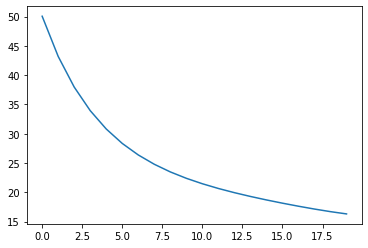

In [168]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(Ef)), Ef)
plt.show()

In [169]:
len(Ef)

20

In [170]:
# 残差が16付近から下がらん！